# Code for creating images in "The Extraordinary Cost-effectiveness of Investments in Aging Biology"
This notebook provides the code to create the images in the *Nature Aging* paper, "The Extraordinary Cost-effectiveness of Investments in Aging Biology".

In [2]:
# Import packages and libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import ogcore.demographics as demog

In [18]:
# Set the directories
images_dir = "../images/"
data_dir = "../data/"

## 1. Create Figure 1
Create Figure 1. Mortality rates by age (probability of death in a given year) across species.

Note: When you execute the `demog.get_mort()` function in the cell below, the code will try to access the UN Population Data Portal's API. Your screen will ask you for an access token. If you have a UN population data access token, just enter it in the box and press enter. Or leave the token in the same directory as this notebook. Otherwise, just hit enter in the token prompt box and the data will be downloaded from another website.

In [3]:
# Get US mortality rates data by age for 2023
mort_rates_2D, infmort_rate_vec = demog.get_mort(
    totpers=100, min_age=0, max_age=99, country_id="840", start_year=2023, end_year=2023
)

Failed to retrieve population data from UN. Reading  from https://github.com/EAPD-DRB/Population-Data instead of UN WPP API


In [4]:
print(mort_rates_2D.shape)
mort_rates_2D

(1, 100)


array([[3.6837000e-04, 2.2107000e-04, 1.6366000e-04, 1.3109000e-04,
        1.2092000e-04, 1.1081000e-04, 1.0272000e-04, 9.7260000e-05,
        1.0295000e-04, 1.0716000e-04, 1.1670000e-04, 1.2900000e-04,
        1.4703000e-04, 1.8884000e-04, 2.4976000e-04, 3.2643000e-04,
        4.1564000e-04, 5.9909000e-04, 6.7235000e-04, 7.5199000e-04,
        8.7346000e-04, 8.9642000e-04, 9.5548000e-04, 9.9305000e-04,
        1.0735700e-03, 1.1221200e-03, 1.1617200e-03, 1.2145200e-03,
        1.2737100e-03, 1.3438400e-03, 1.3716700e-03, 1.3982300e-03,
        1.4725800e-03, 1.5201400e-03, 1.5824800e-03, 1.6310100e-03,
        1.7144200e-03, 1.8093400e-03, 1.9046600e-03, 2.0228600e-03,
        2.0259600e-03, 2.1347400e-03, 2.2172800e-03, 2.3657200e-03,
        2.5953500e-03, 2.8045500e-03, 3.0564800e-03, 3.2921600e-03,
        3.5956400e-03, 3.9087400e-03, 4.2828000e-03, 4.6501500e-03,
        5.0020600e-03, 5.6033400e-03, 6.1804200e-03, 6.6326500e-03,
        7.2407400e-03, 7.6701300e-03, 8.3396800e

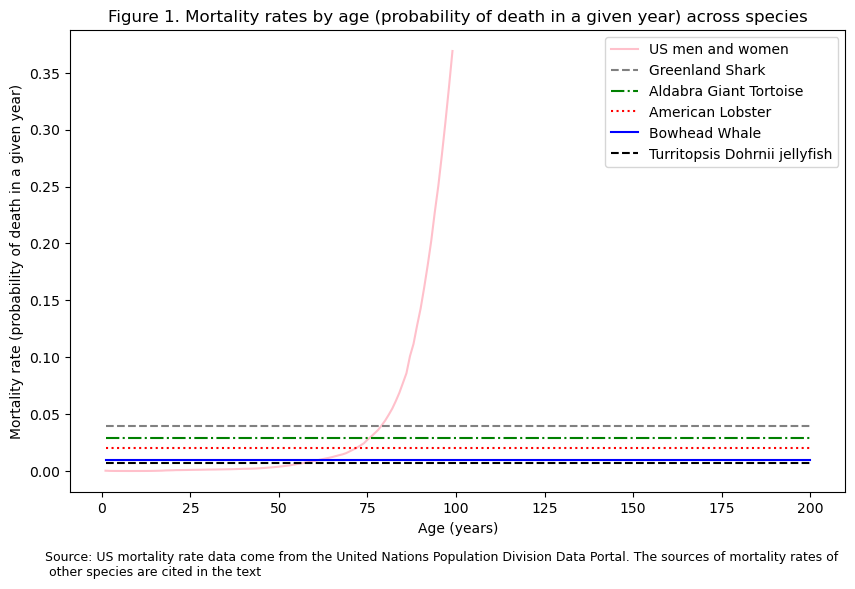

In [20]:
# Create Figure 1
ages_human = np.arange(1, 100)
ages_other = np.arange(1, 201)
mort_human = mort_rates_2D[0, :-1].flatten()
# [Google Search AI: what is the annual mortality rate of the Greenland shark]
# While the annual mortality rate is not precisely known, it's inferred to be
# very low, potentially between 1% and 10% per year. This is due to their slow
# metabolism and slow growth rate.
mort_shark = 0.040
# [Mortality rate of the Aldabra Giant Tortoise, Borne and Cox, 1979] If
# tortoise remains persist on average for about 2 years this represents a
# mortality of 0.6/ha/a. By proportion this is equivalent to an annual
# mortality rate of 29/1000 individuals.
mort_tort = 0.029
# [Google Search AI: what is the annual mortality rate of the American Lobster]
# While precise figures are difficult to pinpoint, studies suggest post-harvest
# mortality rates for lobsters arriving at dealers can range from 0.5% to 5%,
# with an average around 2%. This refers to deaths occurring after the lobster
# has been caught but before it reaches the consumer
mort_lobster = 0.020
# [Google Search AI: what is the natural annual mortality rate of the Bowhead
# Whale] The Natural annual mortality rate of Bowhead whales is currently
# estimated to be less than 1% annually. This is based on the long lifespan of
# bowhead whales, with individuals potentially living for over 200 years, and
# the relatively low reported natural mortality rates in the last few decades,
# according to a recent NOAA Fisheries report
mort_whale = 0.010
mort_jelly = 0.007
# Create figure of mortality rates by age for different species
plt.figure(figsize=(10, 6))
plt.plot(
    ages_human, mort_human, label="US men and women", color="pink",
    linestyle="-"
)
plt.plot(
    ages_other, mort_shark * np.ones_like(ages_other), label="Greenland Shark",
    color="gray", linestyle="--"
)
plt.plot(
    ages_other, mort_tort * np.ones_like(ages_other),
    label="Aldabra Giant Tortoise", color="green", linestyle="-."
)
plt.plot(
    ages_other, mort_lobster * np.ones_like(ages_other),
    label="American Lobster", color="red", linestyle=":"
)
plt.plot(
    ages_other, mort_whale * np.ones_like(ages_other),
    label="Bowhead Whale", color="blue", linestyle="-"
)
plt.plot(
    ages_other, mort_jelly * np.ones_like(ages_other),
    label="Turritopsis Dohrnii jellyfish", color="black", linestyle="--"
)
plt.xlabel("Age (years)")
plt.ylabel("Mortality rate (probability of death in a given year)")
plt.legend()
plt.title(
    "Figure 1. Mortality rates by age (probability of death in a given " +
    "year) across species"
)
# Add a note under the plot
plt.figtext(
    0.1, -0.03,
    'Source: US mortality rate data come from the United Nations Population ' +
    'Division Data Portal. The sources of mortality rates of \n other ' +
    'species are cited in the text',
    ha='left', fontsize=9
)
# Save the figure
image_path = os.path.join(images_dir, 'fig1_mort_species.png')
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Create a Pandas Dataframe that has the 200 mortality rates by age data for
# the shark, tortoise, lobster, whale, and jellyfish. And make a column for
# humans that has data in ages 1-99 and missing values for ages 100-200
df_fig1 = pd.DataFrame(
    np.zeros((200, 7)),
    index=np.arange(1, 201),
    columns=[
        "Age", "Human", "Shark", "Tortoise", "Lobster", "Whale", "Jellyfish"
    ]
)
df_fig1["Age"] = np.arange(1, 201)
df_fig1["Human"] = np.concatenate(
    (mort_human, np.full((101,), np.nan))
)
df_fig1["Shark"] = mort_shark * np.ones((200,))
df_fig1["Tortoise"] = mort_tort * np.ones((200,))
df_fig1["Lobster"] = mort_lobster * np.ones((200,))
df_fig1["Whale"] = mort_whale * np.ones((200,))
df_fig1["Jellyfish"] = mort_jelly * np.ones((200,))
df_fig1.to_csv(os.path.join(data_dir, "fig1.csv"), index=False)

## 2. Create Figure 2
Create Figure 2.US birth rates and death rates per 1,000 pop., 1950-2023.

In [21]:
# Read in birth and death data. Historical US births and deaths historical data
# and forecasts come from Our World in Data, "Births and deaths per year,
# United States: historic estimates with future projectsion based on the UN
# medium scenario",
# https://ourworldindata.org/grapher/births-and-deaths-projected-to-2100?country=~USA
# and "Birth rate vs. death rate, 2023",
# https://ourworldindata.org/grapher/birth-rate-vs-death-rate?country=~USA. The
# original source data come from "World Population Prospects", United Nations,
# https://population.un.org/wpp/.
birth_death_df = pd.read_csv(
    os.path.join(data_dir, 'owd_births_deaths.csv'),
    header=9,
    dtype={
        'year':np.int32, 'births_per_1k_hst': np.float64,
        'births_per_1k_frc': np.float64, 'deaths_per_1k_hst': np.float64,
        'deaths_per_1k_frc': np.float64, 'tot_pop':np.float64,
        'tot_deaths_hst': np.float64, 'tot_deaths_frc': np.float64,
        'tot_births_hst': np.float64, 'tot_births_frc': np.float64,
    }
)
birth_death_df

,year,births_per_1k_hst,births_per_1k_frc,deaths_per_1k_hst,deaths_per_1k_frc,tot_pop,tot_deaths_hst,tot_deaths_frc,tot_births_hst,tot_births_frc
0,1950,23.981,NaN,9.596,NaN,154202683.0,1479684.0,NaN,3697926.0,NaN
1,1951,24.352,NaN,9.603,NaN,156481322.0,1502719.0,NaN,3810644.0,NaN
2,1952,24.561,NaN,9.509,NaN,158794225.0,1509927.0,NaN,3900093.0,NaN
3,1953,24.539,NaN,9.436,NaN,161168319.0,1520815.1,NaN,3954926.0,NaN
4,1954,24.870,NaN,9.027,NaN,163636304.0,1477219.0,NaN,4069617.0,NaN
...,...,...,...,...,...,...,...,...,...,...
146,2096,NaN,8.588315,NaN,11.90473,NaN,NaN,4513263.0,NaN,3891035.0
147,2097,NaN,8.578221,NaN,11.90798,NaN,NaN,4535969.0,NaN,3902765.0
148,2098,NaN,8.570960,NaN,11.90866,NaN,NaN,4558804.0,NaN,3905290.0
149,2099,NaN,8.561096,NaN,11.90681,NaN,NaN,4582590.0,NaN,3913639.0


In [22]:
birth_death_rate_hst_df = birth_death_df[
    ['year', 'births_per_1k_hst', 'deaths_per_1k_hst']
][birth_death_df['year'] <= 2023]
years_hst = birth_death_rate_hst_df['year'].to_numpy()
birth_rates_hst = birth_death_rate_hst_df['births_per_1k_hst'].to_numpy()
death_rates_hst = birth_death_rate_hst_df['deaths_per_1k_hst'].to_numpy()

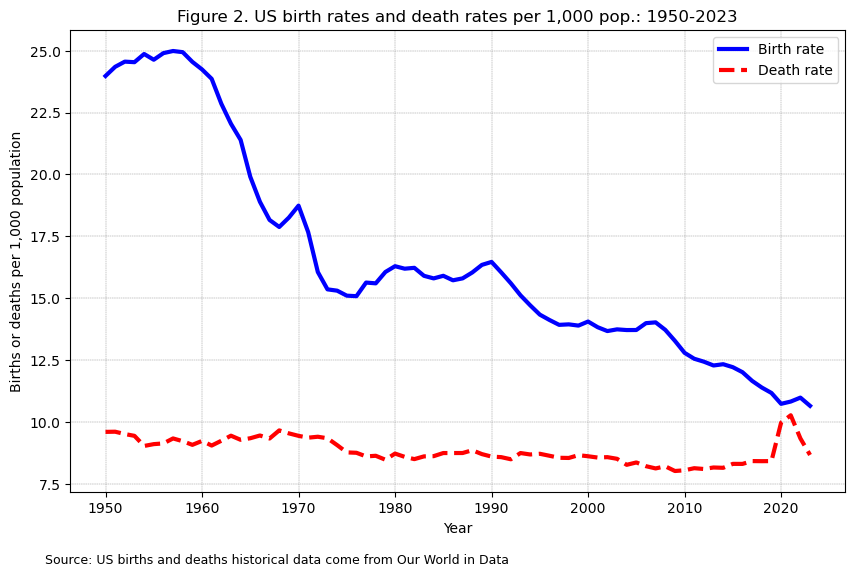

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(
    years_hst, birth_rates_hst, linestyle='-', color='blue', linewidth=3,
    label='Birth rate'
)
plt.plot(
    years_hst, death_rates_hst, linestyle='--', color='red', linewidth=3,
    label='Death rate'
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.xlabel("Year")
plt.ylabel("Births or deaths per 1,000 population")
plt.legend()
plt.title("Figure 2. US birth rates and death rates per 1,000 pop.: 1950-2023")
# Add a note under the plot
plt.figtext(
    0.1, -0.01,
    'Source: US births and deaths historical data come from Our World in Data',
    ha='left', fontsize=9
)
# Save the figure
image_path = os.path.join(images_dir, 'fig2_birth_death.png')
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Create a Pandas Dataframe that has 'Years' from 1950 to 2023, the
# birth_rates_hst variable and the death_rates_hst variable
df_fig2 = pd.DataFrame(
    np.zeros((74, 3)),
    index=np.arange(1950, 2024),
    columns=["year", "birth_rates_hst", "death_rates_hst"]
)
df_fig2["year"] = np.arange(1950, 2024)
df_fig2["birth_rates_hst"] = birth_rates_hst
df_fig2["death_rates_hst"] = death_rates_hst
df_fig2.to_csv(os.path.join(data_dir, "fig2.csv"), index=False)